In [1]:
%load_ext autoreload
%autoreload 2

In [25]:
import sys
sys.path.append("..")

from torch.utils.data import Subset
from vqvaes.trainer import VQVAETrainer
from vqvaes.models import build_vqvae
from data.nouns import make_datasets, create_dataloader
import torchvision.transforms.v2 as v2
import matplotlib.pyplot as plt
from vqvaes.evals import evaluate_vqvae_recon, evaluate_vqvae

In [3]:
transform = v2.Compose([
    v2.Resize((128, 128)),
    v2.ToTensor()
])
train_set, test_set = make_datasets(transform=transform)
# make subset of trainset
train_set = Subset(train_set, range(10))
train_loader = create_dataloader(train_set, batch_size=32)
test_loader = create_dataloader(test_set, batch_size=32)

/home/ubuntu/.cache/pypoetry/virtualenvs/vqvaes-Y5Ctg_tt-py3.10/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


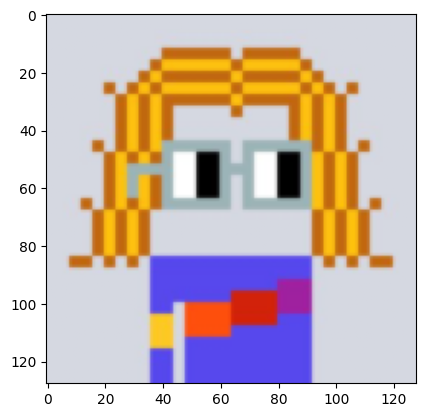

In [4]:
image = train_set[0]["image"]
plt.imshow(image.permute(1, 2, 0))

In [5]:
vqvae = build_vqvae(
    in_channels=3,
    num_channels=32,
    num_residual_blocks=1,
    num_residual_channels=16,
    codebook_size=512,
    codebook_dim=16,
)

trainer = VQVAETrainer(vqvae, train_loader, test_loader, lr=3e-4, iterations=100, device="cuda")

In [10]:
trainer.train()

  6%|▌         | 6/100 [00:00<00:02, 43.52it/s, loss=0.218, perplexity=1.84, recon_loss=0.0949, vq_loss=0.123]

100%|██████████| 100/100 [00:02<00:00, 44.31it/s, loss=0.221, perplexity=2.33, recon_loss=0.054, vq_loss=0.167] 


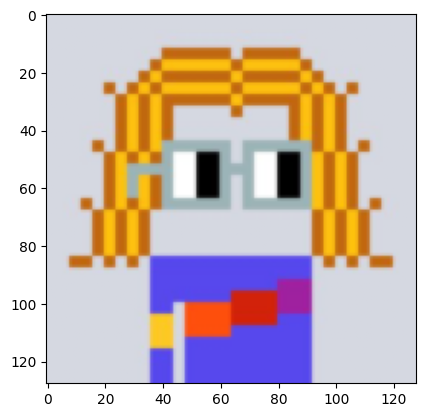

In [11]:
image = train_set[0]["image"]
plt.imshow(image.permute(1, 2, 0))

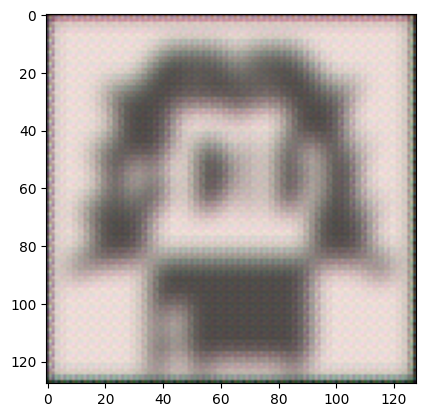

In [12]:
recon = vqvae(image.unsqueeze(0).cuda())[0].squeeze(0).detach().cpu()
plt.imshow(recon.permute(1, 2, 0))

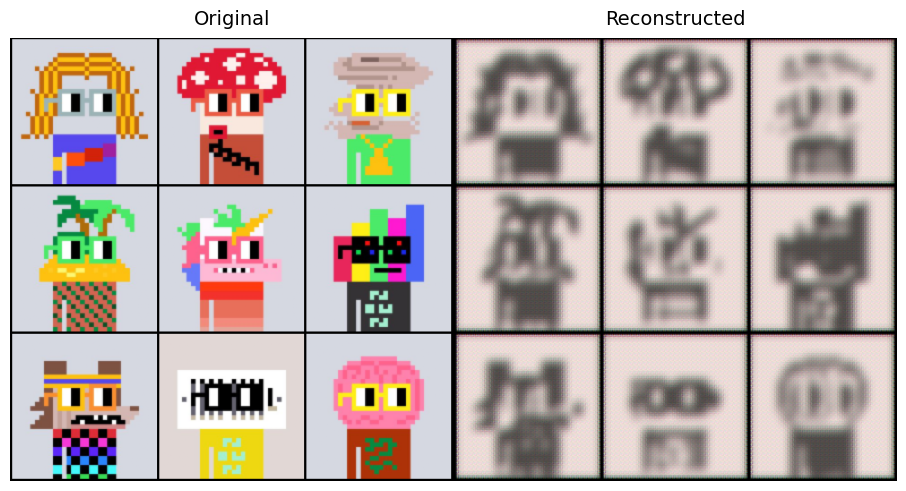

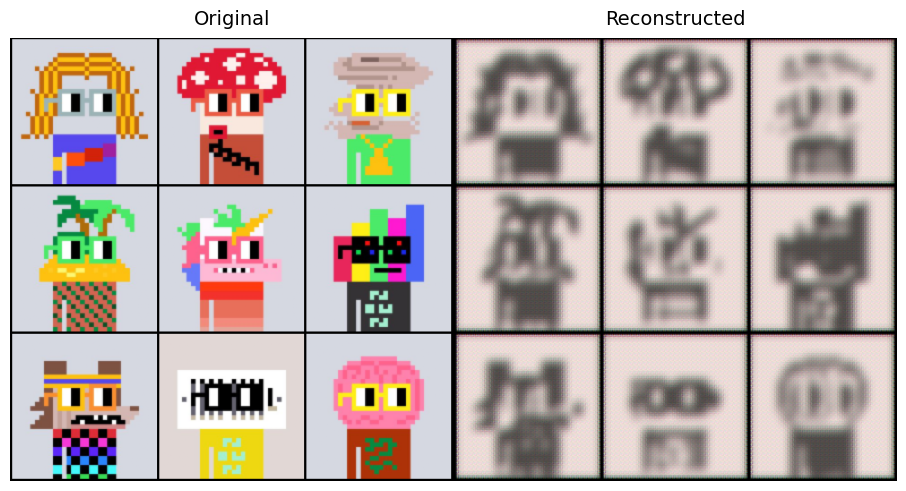

In [24]:
evaluate_vqvae_recon(
    train_set,
    indices=[0, 1, 2, 3, 4, 5, 6, 8, 9],
    model=vqvae,
)

In [29]:
evaluate_vqvae(train_loader, vqvae)

Evaluating VQVAE: 100%|██████████| 1/1 [00:00<00:00, 39.77it/s]


{'loss': 0.23197832703590393, 'perplexity': 2.247432231903076}